In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/Fingerprints.zip"
extract_path = "/content/Fingerprints"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import defaultdict
from PIL import Image
import os


In [ ]:

# Dataset path
dataset_root = "/content/Fingerprints/dataset"


In [ ]:

# Prepare containers
class_counts = defaultdict(int)
image_shapes = defaultdict(int)



In [ ]:
import os
import matplotlib.pyplot as plt
dataset_dir = "/content/Fingerprints/dataset"
class_counts_dict = {}
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ])
        class_counts_dict[class_name] = count
total_images = sum(class_counts_dict.values())
print("✅ Total Images in Dataset:", total_images)
print("✅ Image Count per Class:")
for cls, count in class_counts_dict.items():
    print(f"   {cls}: {count}")


✅ Total Images in Dataset: 8000
✅ Image Count per Class:
   A+: 1000
   A-: 1000
   AB+: 1000
   AB-: 1000
   B+: 1000
   B-: 1000
   O+: 1000
   O-: 1000


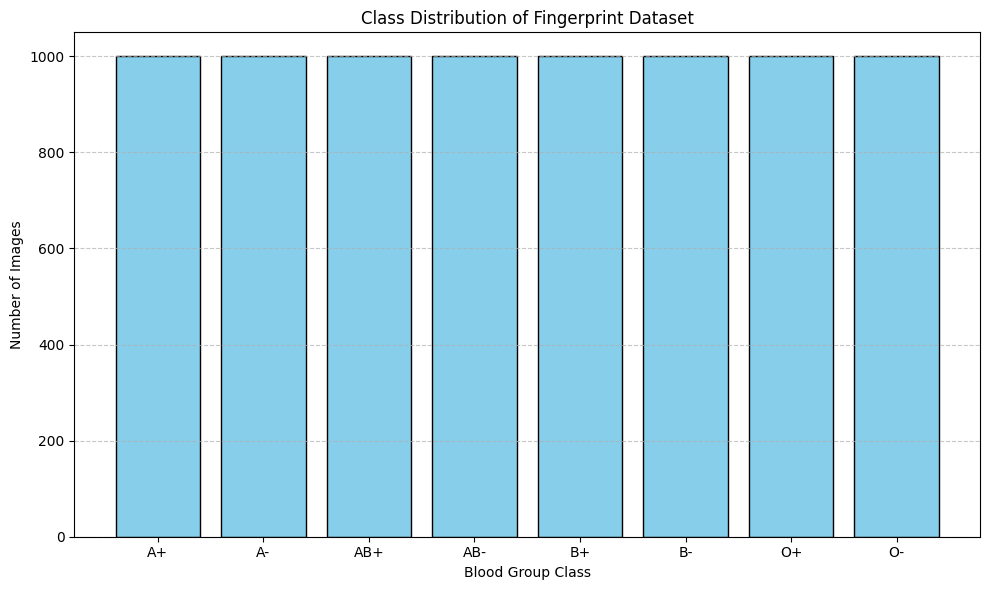

In [ ]:

# Plotting
labels = list(class_counts_dict.keys())
counts = list(class_counts_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Blood Group Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Fingerprint Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from collections import Counter
dataset_path = "/content/Fingerprints/dataset"
image_shapes = Counter()
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    image_shapes[img.size] += 1
            except Exception as e:
                print(f"❌ Could not read {img_path}: {e}")
print("\n🖼️ Image Sizes:\n")
if image_shapes:
    for size, count in image_shapes.items():
        print(f"Size {size[0]}x{size[1]}: {count} images")
else:
    print("No images found or failed to read any image.")



🖼️ Image Sizes:

Size 96x103: 7939 images
Size 241x298: 59 images
Size 103x96: 2 images


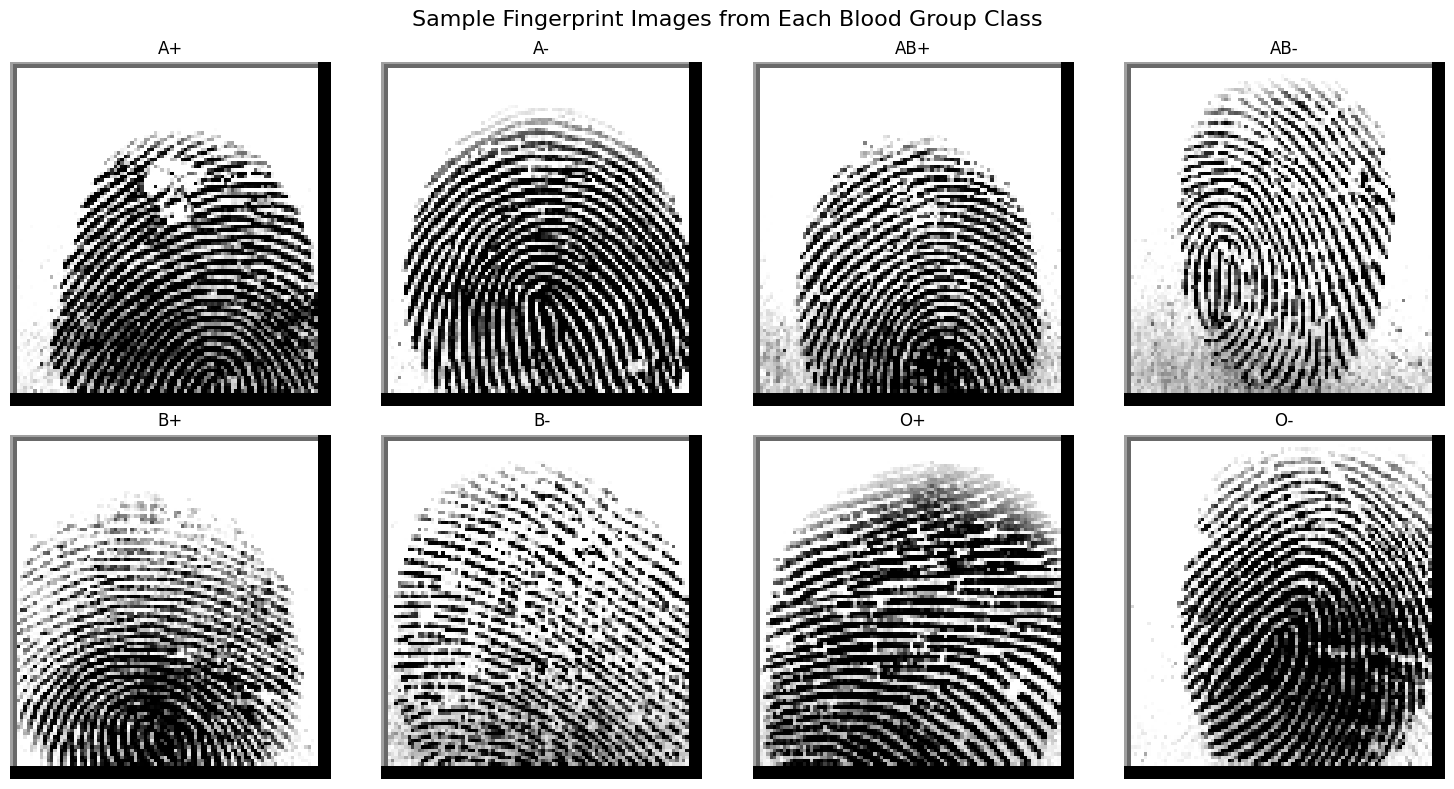

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_root = "/content/Fingerprints/dataset"
sample_images = []
labels = []

for label_folder in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, label_folder)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg')):
                sample_images.append(os.path.join(class_path, file))
                labels.append(label_folder)
                break
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.suptitle("Sample Fingerprint Images from Each Blood Group Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
original_dataset_dir = "/content/Fingerprints/dataset"
split_dataset_dir = "content/Fingerprints/split_dataset"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_paths = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(image_extensions):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split dataset: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

def copy_files(image_list, labels_list, split_name):
    for img_path, label in zip(image_list, labels_list):
        dst_dir = os.path.join(split_dataset_dir, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))
copy_files(X_train, y_train, 'train')
copy_files(X_val, y_val, 'val')
copy_files(X_test, y_test, 'test')

print("✅ Dataset successfully split into train/val/test with class balance.")


✅ Dataset successfully split into train/val/test with class balance.


In [ ]:
import shutil
split_dataset_dir = "/content/content/Fingerprints/split_dataset"
output_zip_path = "content/Fingerprints_split_dataset.zip"
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""),
                    format='zip',
                    root_dir=split_dataset_dir)

print(f"✅ Zipped dataset created at: {output_zip_path}")


✅ Zipped dataset created at: content/Fingerprints_split_dataset.zip


In [ ]:
import zipfile
import os
zip_path = "/content/content/Fingerprints_split_dataset.zip"
extract_path = "/content/Fingerprints_split_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints_split_dataset


In [ ]:
import os
base_dir = "/content/Fingerprints_split_dataset"
splits = ['train', 'val', 'test']
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"\n📁 {split.upper()} Set:")

    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)
            ])
            total_images += num_images
            print(f"  🔸 Class {class_name}: {num_images} images")

    print(f"✅ Total images in {split} set: {total_images}")



📁 TRAIN Set:
  🔸 Class A+: 700 images
  🔸 Class B+: 700 images
  🔸 Class AB+: 700 images
  🔸 Class O+: 699 images
  🔸 Class B-: 700 images
  🔸 Class O-: 700 images
  🔸 Class A-: 700 images
  🔸 Class AB-: 700 images
✅ Total images in train set: 5599

📁 VAL Set:
  🔸 Class A+: 150 images
  🔸 Class B+: 150 images
  🔸 Class AB+: 150 images
  🔸 Class O+: 151 images
  🔸 Class B-: 150 images
  🔸 Class O-: 150 images
  🔸 Class A-: 150 images
  🔸 Class AB-: 150 images
✅ Total images in val set: 1201

📁 TEST Set:
  🔸 Class A+: 150 images
  🔸 Class B+: 150 images
  🔸 Class AB+: 150 images
  🔸 Class O+: 150 images
  🔸 Class B-: 150 images
  🔸 Class O-: 150 images
  🔸 Class A-: 150 images
  🔸 Class AB-: 150 images
✅ Total images in test set: 1200


In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatialAttention(nn.Module):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3)

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        concat = torch.cat([avg_out, max_out], dim=1)
        attention = torch.sigmoid(self.conv(concat))
        return x * attention

class CNNWithAttention(nn.Module):
    def __init__(self, num_classes):
        super(CNNWithAttention, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.attention = SpatialAttention()
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.attention(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# --- Transformations ---
'''transform = transforms.Compose([
    transforms.Grayscale(),               # Convert to 1 channel
    transforms.Resize((128, 128)),        # Resize
    transforms.ToTensor(),                # Convert to tensor
    transforms.Normalize([0.5], [0.5])    # Normalize grayscale
])'''
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=5),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


data_dir = "/content/Fingerprints_split_dataset"
batch_size = 32

train_data = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=transform)
val_data = datasets.ImageFolder(root=os.path.join(data_dir, "val"), transform=transform)
test_data = datasets.ImageFolder(root=os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

num_classes = len(train_data.classes)

# --- Model, Loss, Optimizer ---
model = CNNWithAttention(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


In [ ]:
import torch
import time

train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

epochs = 30
best_val_loss = float('inf')
patience = 5
patience_counter = 0
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

for epoch in range(epochs):
    start_time = time.time()
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = 100 * correct / total

    # --- Validation phase ---
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= val_total
    val_acc = 100 * val_correct / val_total
    scheduler.step(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    elapsed = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"{total//batch_size}/{total//batch_size} ━{'━'*20} {int(elapsed)}s {int(elapsed*1000//total)}ms/step - accuracy: {train_acc/100:.4f} - loss: {train_loss:.4f} - val_accuracy: {val_acc/100:.4f} - val_loss: {val_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.4131 - loss: 1.4836 - val_accuracy: 0.6112 - val_loss: 0.9986
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6289 - loss: 0.9655 - val_accuracy: 0.7377 - val_loss: 0.7125
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7226 - loss: 0.7288 - val_accuracy: 0.7735 - val_loss: 0.6013
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7589 - loss: 0.6225 - val_accuracy: 0.8177 - val_loss: 0.4878
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7971 - loss: 0.5425 - val_accuracy: 0.8177 - val_loss: 0.4695
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8100 - loss: 0.5011 - val_accuracy: 0.8293 - val_loss: 0.4636
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8296 - loss: 0.4546 - val_accuracy: 0.8351 - val_loss: 0.4234
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8437 - loss: 0.4100 - va

In [ ]:
# Set model to evaluation mode
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = 100 * correct / total
print(f"\n Test Accuracy: {test_accuracy:.2f}%")


 Test Accuracy: 88.92%


In [ ]:
# Set model to evaluation mode
model.eval()

val_correct = 0
val_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

val_accuracy = 100 * val_correct / val_total
print(f"🧪 Validation Accuracy: {val_accuracy:.2f}%")


🧪 Validation Accuracy: 87.76%


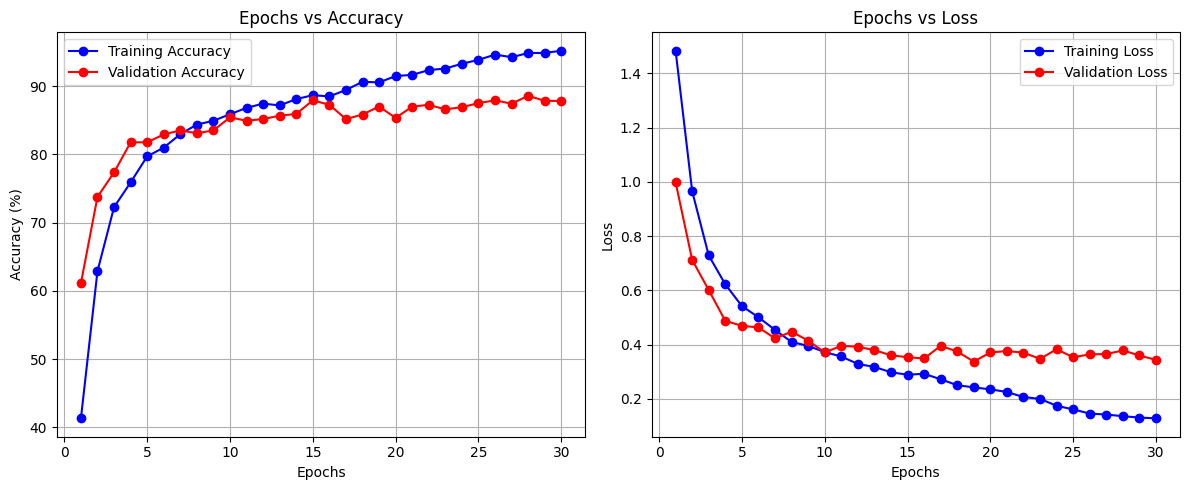

In [ ]:
# After training, plot the results:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_acc_list, 'bo-', label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc_list, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_loss_list, 'bo-', label='Training Loss')
plt.plot(range(1, epochs+1), val_loss_list, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

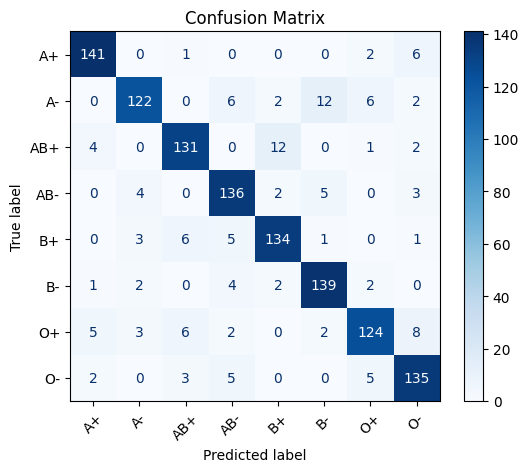

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

def predict_from_test_path(test_path, model, device):
    # Define the same transform as used during training
    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])

    # Load dataset (structured by folders)
    test_dataset = datasets.ImageFolder(root=test_path, transform=transform)
    class_to_idx = test_dataset.class_to_idx
    idx_to_class = {v: k for k, v in class_to_idx.items()}

    # Track one sample per class
    seen_classes = set()

    print("\n--- Predicting one fingerprint per blood group ---\n")

    for img_path, actual_label_idx in test_dataset.samples:
        actual_class = idx_to_class[actual_label_idx]
        if actual_class in seen_classes:
            continue  # Already seen this class

        seen_classes.add(actual_class)

        # Load and preprocess image
        image = Image.open(img_path).convert("L")
        image_tensor = transform(image).unsqueeze(0).to(device)

        # Predict
        model.eval()
        with torch.no_grad():
            output = model(image_tensor)
            _, predicted_idx = torch.max(output, 1)
            predicted_class = idx_to_class[predicted_idx.item()]

        # Display and print
        plt.imshow(image_tensor.cpu().squeeze(), cmap='gray')
        plt.title(f"Actual: {actual_class} | Predicted: {predicted_class}")
        plt.axis('off')
        plt.show()

        print(f"Actual Blood Group: {actual_class} | Predicted Blood Group: {predicted_class}\n")

        if len(seen_classes) == len(test_dataset.classes):
            break  # All classes covered



--- Predicting one fingerprint per blood group ---



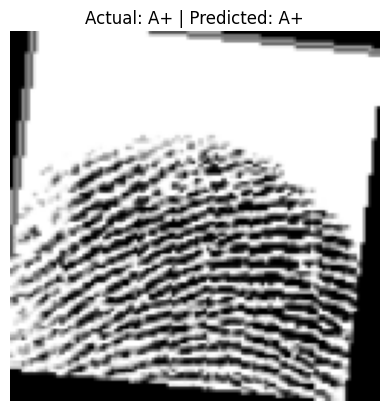

Actual Blood Group: A+ | Predicted Blood Group: A+



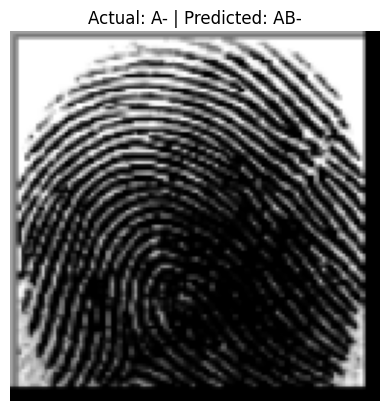

Actual Blood Group: A- | Predicted Blood Group: AB-



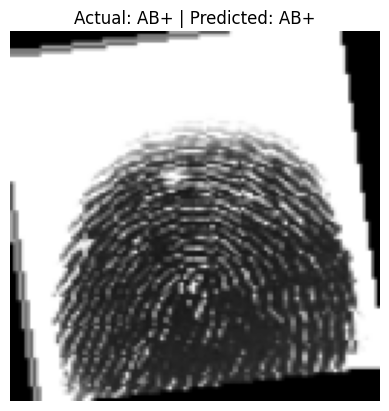

Actual Blood Group: AB+ | Predicted Blood Group: AB+



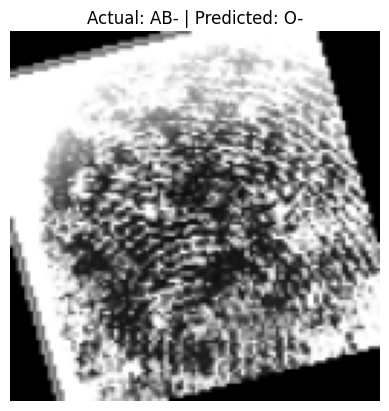

Actual Blood Group: AB- | Predicted Blood Group: O-



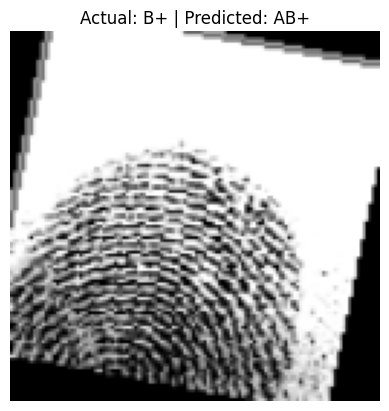

Actual Blood Group: B+ | Predicted Blood Group: AB+



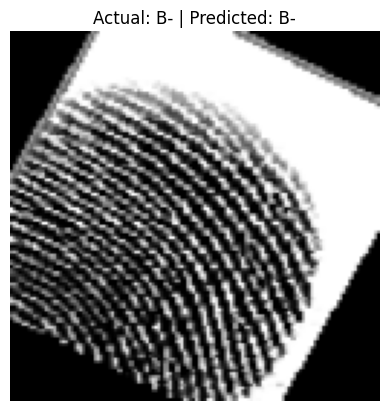

Actual Blood Group: B- | Predicted Blood Group: B-



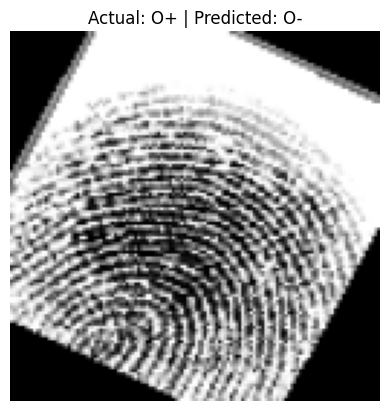

Actual Blood Group: O+ | Predicted Blood Group: O-



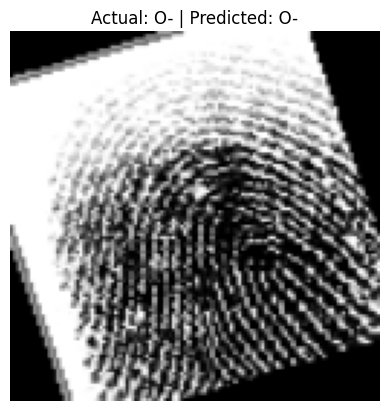

Actual Blood Group: O- | Predicted Blood Group: O-



In [ ]:
test_path = "/content/Fingerprints_split_dataset/test"  # or your actual path
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predict_from_test_path(test_path, model, device)
